# Relationship between bank loan and MRO
A regression is performed to explain the relationship between bank loans and MRO from 2005 to 2023 with monthly observations.

Starting data:

In [89]:
data=read.csv("C:\\Users\\vdb99\\Desktop\\TL_dataset.csv", header = TRUE)
head(data)

,DATE,DFR,MRO,MLF,euro_area_TL
,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,2005-01-31,1,2,3,3169582
2,2005-02-28,1,2,3,3173060
3,2005-03-31,1,2,3,3189366
4,2005-04-30,1,2,3,3215310
5,2005-05-31,1,2,3,3234313
6,2005-06-30,1,2,3,3283311


MRO time series and bank loans time series:

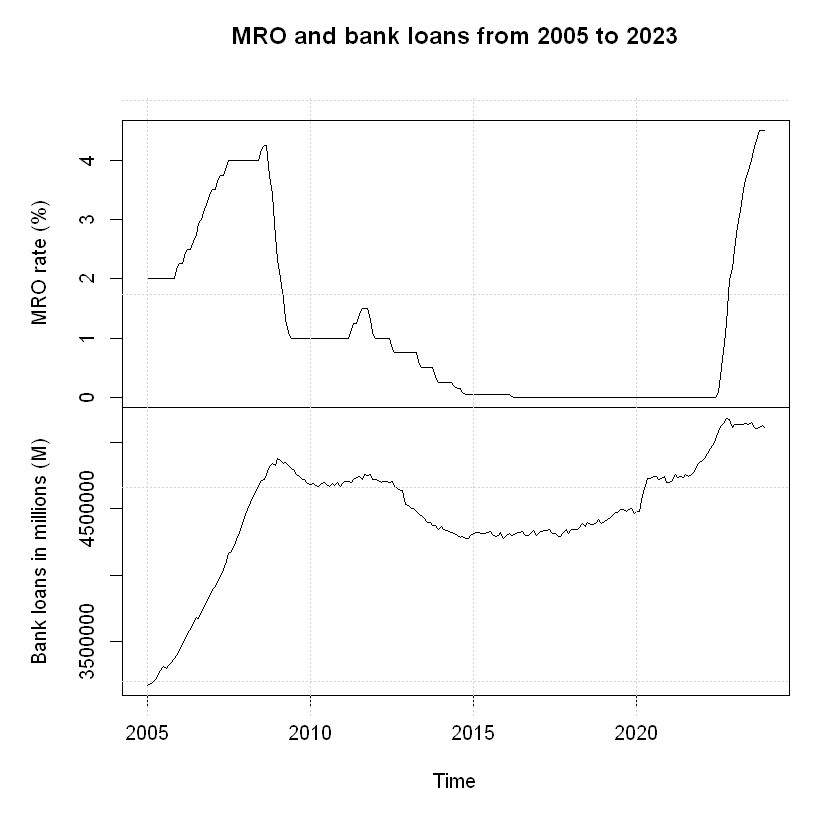

In [91]:
MRO=ts(data[,3], start=2005, frequency = 12); loans=ts(data[,5], start=2005, frequency = 12)
MROandLoans=cbind(MRO, loans)
colnames(MROandLoans)=c("MRO rate (%)", "Bank loans in millions (M)")
plot(MROandLoans,main = "MRO and bank loans from 2005 to 2023")
grid()

The model is:
$$
\text{LoanReturns}_t = \alpha + \beta \cdot \text{MRO}_{t - k} + \varepsilon_t
$$

We divide the historical series into sub-periods based on the monetary policy regimes:

#### 2005–2008: Conventional approach

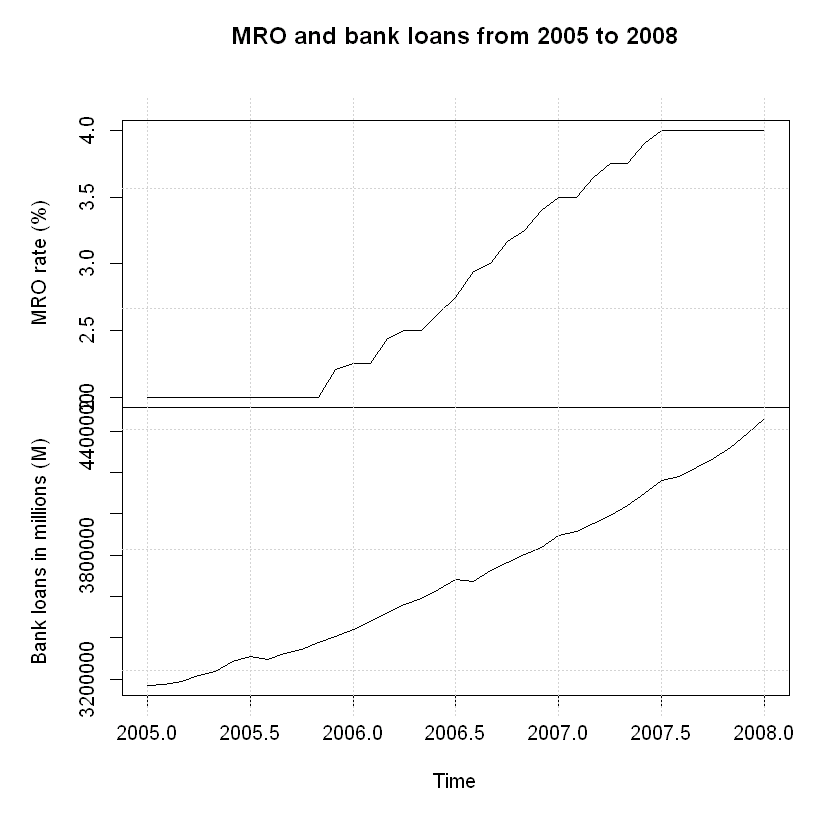

In [93]:
MRO.05.08=window(MRO, start = 2005, end=2008)
loans.05.08=window(loans, start=2005, end=2008)
MROandLoans.05.08=cbind(MRO.05.08, loans.05.08)
colnames(MROandLoans.05.08)=c("MRO rate (%)", "Bank loans in millions (M)")
plot(MROandLoans.05.08, main = "MRO and bank loans from 2005 to 2008")
grid()

Theoretically, the effect of MRO changes is reflected on loans with a lag of 3 to 12 months.

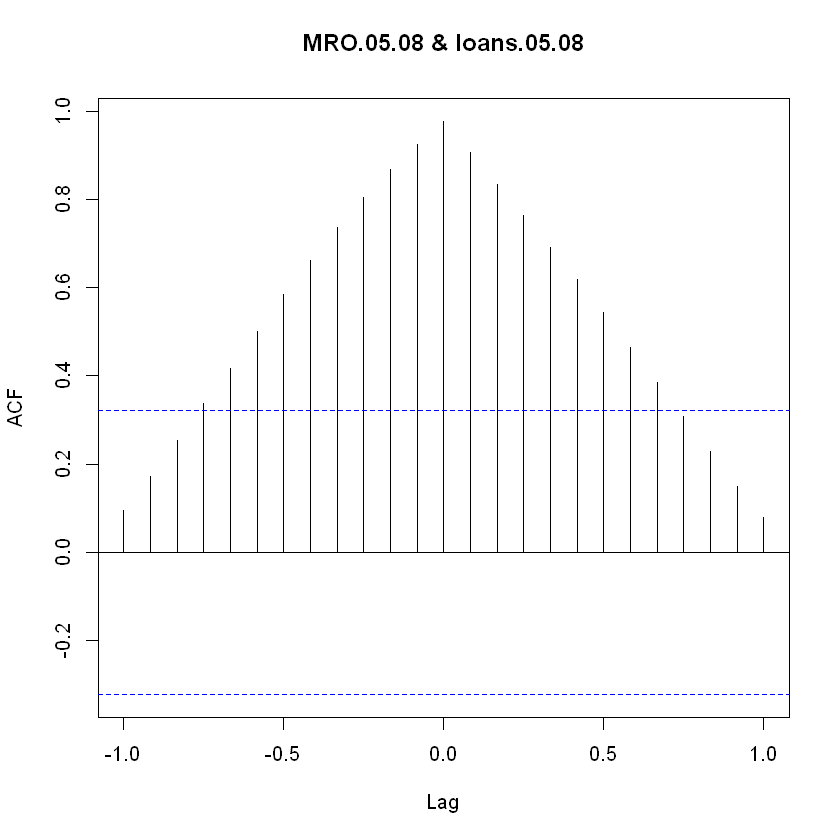

In [95]:
ccf(MRO.05.08, loans.05.08)

The correlogram of the cross-correlation between MRO shows higher values ​​at negative lags, this confirms that MRO precedes loans. Let's find the right lag, but first let's calculate the loan returns needed to run the regressions:

In [97]:
loan_returns.05.08=(diff(loans.05.08)/lag(loans.05.08))*100
#lag3
MRO.05.08.lag3=lag(MRO.05.08, 3)
MRO.loan.05.08.lag3=ts.intersect(MRO.05.08.lag3, loan_returns.05.08) #We use the ts.intersect function to avoid length errors in regression
model_lag3.05.08=lm(MRO.loan.05.08.lag3[,2]~MRO.loan.05.08.lag3[,1]) 
#lag6
MRO.05.08.lag6=lag(MRO.05.08, 6)
MRO.loan.05.08.lag6=ts.intersect(MRO.05.08.lag6, loan_returns.05.08) 
model_lag6.05.08=lm(MRO.loan.05.08.lag6[,2]~MRO.loan.05.08.lag6[,1]) 
#lag9
MRO.05.08.lag9=lag(MRO.05.08, 9)
MRO.loan.05.08.lag9=ts.intersect(MRO.05.08.lag9, loan_returns.05.08) 
model_lag9.05.08=lm(MRO.loan.05.08.lag9[,2]~MRO.loan.05.08.lag9[,1])
#BIC&AIC
cat("AIC lag3:", AIC(model_lag3.05.08), " BIC lag3:", BIC(model_lag3.05.08))
cat(" AIC lag6:", AIC(model_lag6.05.08), " BIC lag6:", BIC(model_lag6.05.08))
cat(" AIC lag9:", AIC(model_lag9.05.08), " BIC lag9:", BIC(model_lag9.05.08))

AIC lag3: 40.86291  BIC lag3: 45.35243 AIC lag6: 36.97391  BIC lag6: 41.1775 AIC lag9: 33.91947  BIC lag9: 37.80698

Both criteria confirm that the best lag is lag 9. Let's analyze the model with this lag:

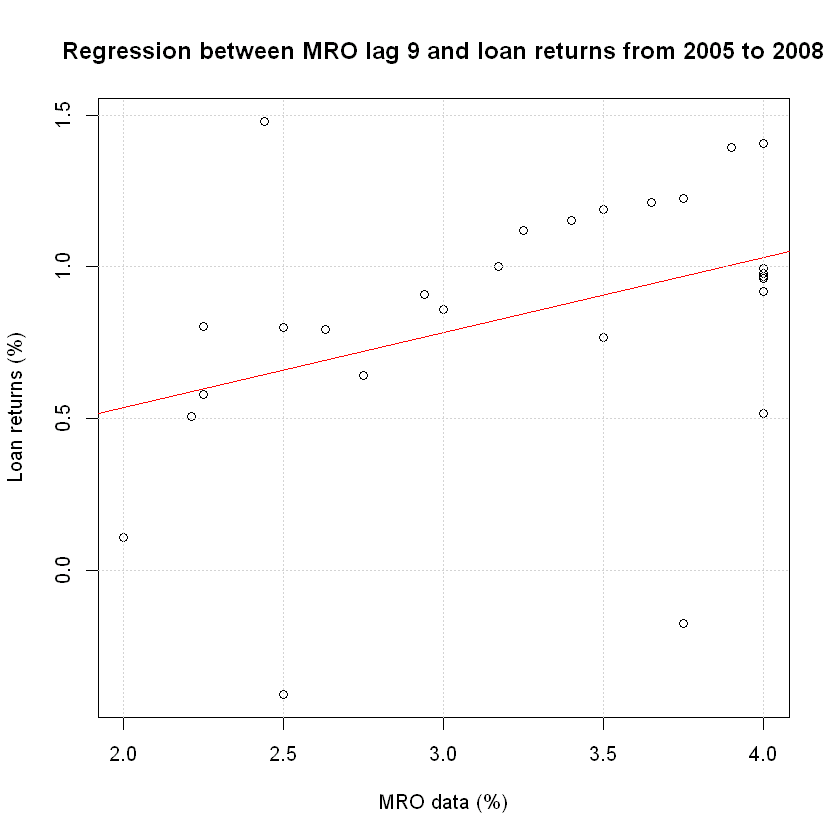

In [99]:
plot(as.numeric(MRO.loan.05.08.lag9[,1]),as.numeric(MRO.loan.05.08.lag9[,2]), xlab = "MRO data (%)", ylab = "Loan returns (%)", main = "Regression between MRO lag 9 and loan returns from 2005 to 2008")
abline(model_lag9.05.08, col='red')
grid()

In [137]:
summary(model_lag9.05.08)


Call:
lm(formula = MRO.loan.05.08.lag9[, 2] ~ MRO.loan.05.08.lag9[, 
    1])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.14349 -0.07962  0.07575  0.26380  0.83546 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)               0.04322    0.39602   0.109   0.9140  
MRO.loan.05.08.lag9[, 1]  0.24662    0.11983   2.058   0.0501 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4217 on 25 degrees of freedom
Multiple R-squared:  0.1449,	Adjusted R-squared:  0.1107 
F-statistic: 4.236 on 1 and 25 DF,  p-value: 0.05015


#### 2009–2014: Response to the financial crisis

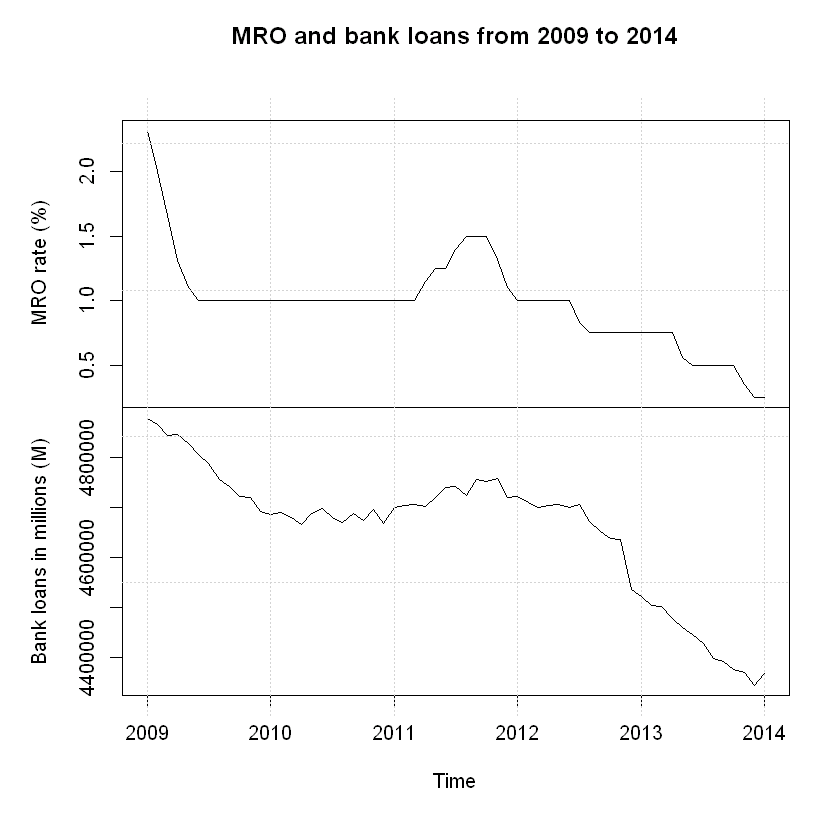

In [103]:
MRO.09.14=window(MRO, start=2009, end=2014)
loans.09.14=window(loans, start=2009, end=2014)
MROandLoans.09.14=cbind(MRO.09.14, loans.09.14)
colnames(MROandLoans.09.14)=c("MRO rate (%)", "Bank loans in millions (M)")
plot(MROandLoans.09.14, main = "MRO and bank loans from 2009 to 2014")
grid()

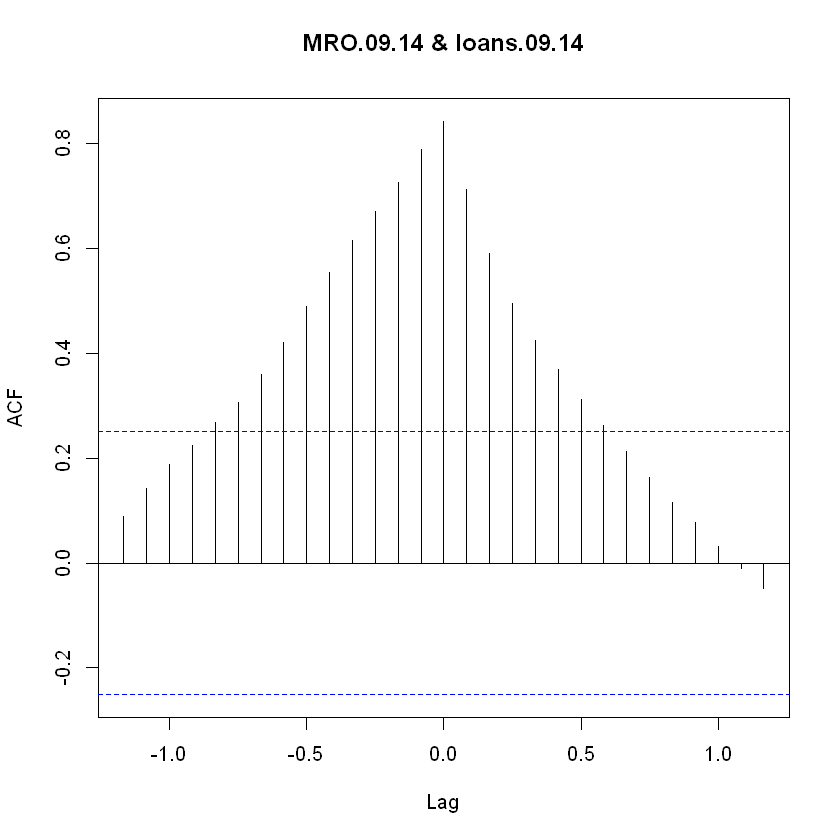

In [105]:
ccf(MRO.09.14, loans.09.14)

The correlogram of the cross-correlation between MRO shows higher values ​​at negative lags, this confirms that MRO precedes loans. Let's find the right lag, but first let's calculate the loan returns needed to run the regressions:

In [107]:
loan_returns.09.14=(diff(loans.09.14)/lag(loans.09.14))*100
#lag3
MRO.09.14.lag3=lag(MRO.09.14, 3)
MRO.loan.09.14.lag3=ts.intersect(MRO.09.14.lag3, loan_returns.09.14) #We use the ts.intersect function to avoid length errors in regression
model_lag3.09.14=lm(MRO.loan.09.14.lag3[,2]~MRO.loan.09.14.lag3[,1]) 
#lag6
MRO.09.14.lag6=lag(MRO.09.14, 6)
MRO.loan.09.14.lag6=ts.intersect(MRO.09.14.lag6, loan_returns.09.14) 
model_lag6.09.14=lm(MRO.loan.09.14.lag6[,2]~MRO.loan.09.14.lag6[,1]) 
#lag9
MRO.09.14.lag9=lag(MRO.09.14, 9)
MRO.loan.09.14.lag9=ts.intersect(MRO.09.14.lag9, loan_returns.09.14) 
model_lag9.09.14=lm(MRO.loan.09.14.lag9[,2]~MRO.loan.09.14.lag9[,1])
#BIC&AIC
cat("AIC lag3:", AIC(model_lag3.09.14), " BIC lag3:", BIC(model_lag3.09.14))
cat(" AIC lag6:", AIC(model_lag6.09.14), " BIC lag6:", BIC(model_lag6.09.14))
cat(" AIC lag9:", AIC(model_lag9.09.14), " BIC lag9:", BIC(model_lag9.09.14))

AIC lag3: 64.79854  BIC lag3: 70.92769 AIC lag6: 61.88938  BIC lag6: 67.85633 AIC lag9: 62.5129  BIC lag9: 68.30838

Both criteria confirm that the best lag is lag 6. Let's analyze the model with this lag:

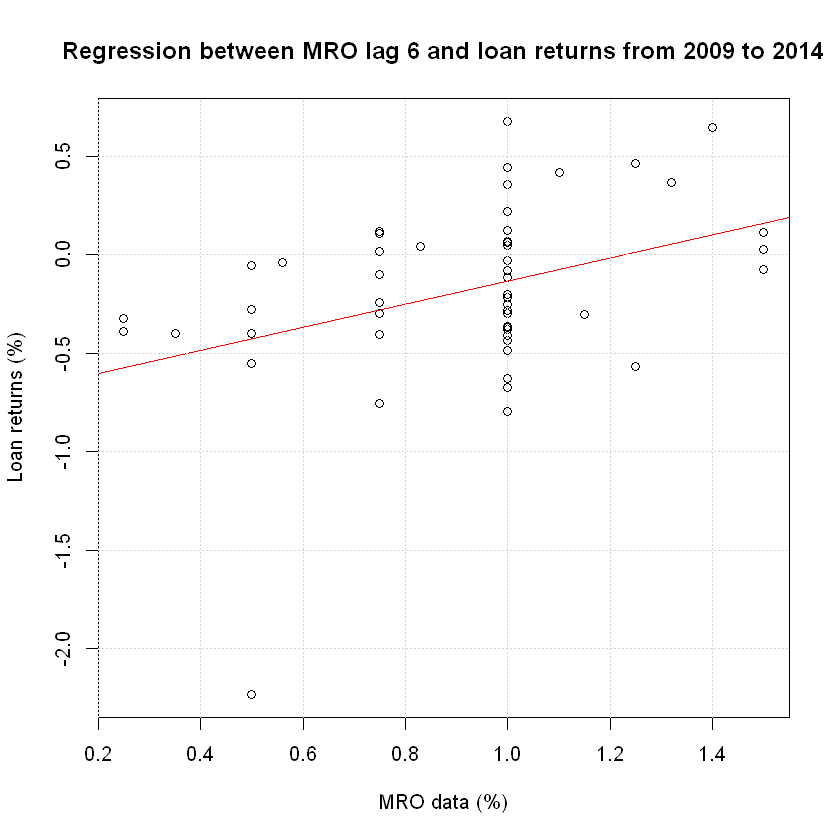

In [111]:
plot(as.numeric(MRO.loan.09.14.lag6[,1]),as.numeric(MRO.loan.09.14.lag6[,2]), xlab = "MRO data (%)", ylab = "Loan returns (%)", main = "Regression between MRO lag 6 and loan returns from 2009 to 2014")
abline(model_lag6.09.14, col='red')
grid()

In [139]:
summary(model_lag6.09.14)


Call:
lm(formula = MRO.loan.09.14.lag6[, 2] ~ MRO.loan.09.14.lag6[, 
    1])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.80918 -0.23715  0.02922  0.26948  0.80928 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -0.7181     0.1898  -3.783 0.000402 ***
MRO.loan.09.14.lag6[, 1]   0.5877     0.1979   2.970 0.004502 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4137 on 52 degrees of freedom
Multiple R-squared:  0.145,	Adjusted R-squared:  0.1286 
F-statistic: 8.819 on 1 and 52 DF,  p-value: 0.004502


#### 2015–2019: Quantitative Easing (QE)

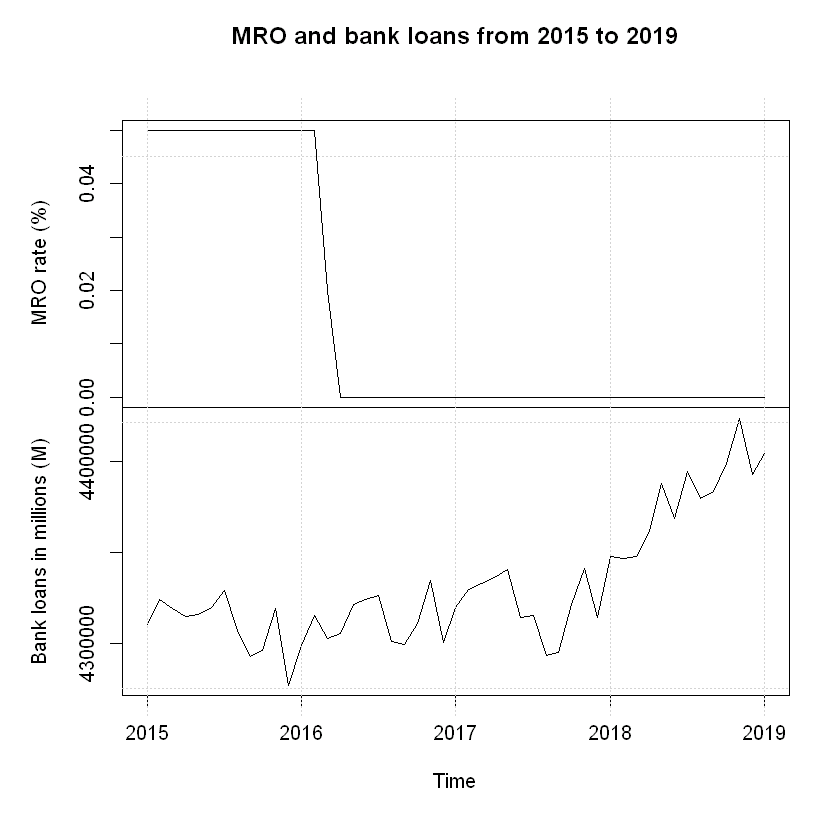

In [115]:
MRO.15.19=window(MRO, start=2015, end=2019)
loans.15.19=window(loans, start=2015, end=2019)
MROandLoans.15.19=cbind(MRO.15.19, loans.15.19)
colnames(MROandLoans.15.19)=c("MRO rate (%)", "Bank loans in millions (M)")
plot(MROandLoans.15.19, main = "MRO and bank loans from 2015 to 2019")
grid()

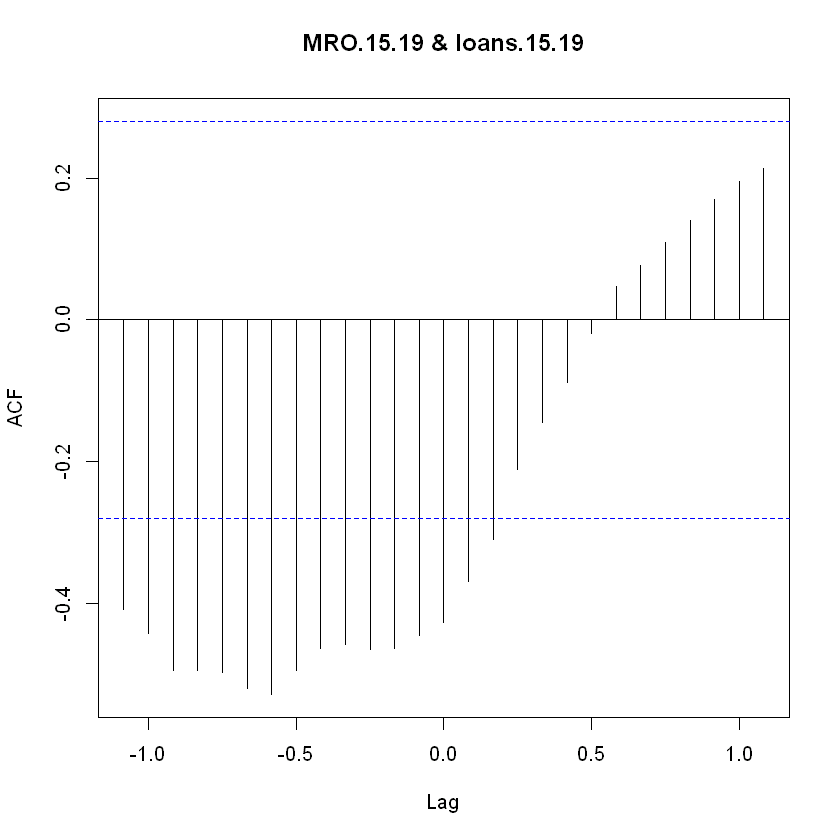

In [117]:
ccf(MRO.15.19, loans.15.19)

The correlogram of the cross-correlation between MRO shows higher values ​​at negative lags, this confirms that MRO precedes loans. We also note that the cross-correlation is negative in this case, the relationship between MRO and loans in this sub-period is inversely proportional as economic theory predicts. Let's find the right lag, but first let's calculate the loan returns needed to run the regressions:

In [119]:
loan_returns.15.19=(diff(loans.15.19)/lag(loans.15.19))*100
#lag3
MRO.15.19.lag3=lag(MRO.15.19, 3)
MRO.loan.15.19.lag3=ts.intersect(MRO.15.19.lag3, loan_returns.15.19) #We use the ts.intersect function to avoid length errors in regression
model_lag3.15.19=lm(MRO.loan.15.19.lag3[,2]~MRO.loan.15.19.lag3[,1]) 
#lag6
MRO.15.19.lag6=lag(MRO.15.19, 6)
MRO.loan.15.19.lag6=ts.intersect(MRO.15.19.lag6, loan_returns.15.19) 
model_lag6.15.19=lm(MRO.loan.15.19.lag6[,2]~MRO.loan.15.19.lag6[,1]) 
#lag9
MRO.15.19.lag9=lag(MRO.15.19, 9)
MRO.loan.15.19.lag9=ts.intersect(MRO.15.19.lag9, loan_returns.15.19) 
model_lag9.15.19=lm(MRO.loan.15.19.lag9[,2]~MRO.loan.15.19.lag9[,1])
#BIC&AIC
cat("AIC lag3:", AIC(model_lag3.15.19), " BIC lag3:", BIC(model_lag3.15.19))
cat(" AIC lag6:", AIC(model_lag6.15.19), " BIC lag6:", BIC(model_lag6.15.19))
cat(" AIC lag9:", AIC(model_lag9.15.19), " BIC lag9:", BIC(model_lag9.15.19))

AIC lag3: 52.15819  BIC lag3: 57.57818 AIC lag6: 50.6279  BIC lag6: 55.84091 AIC lag9: 45.69453  BIC lag9: 50.68521

Both criteria confirm that the best lag is lag 9. Let's analyze the model with this lag:

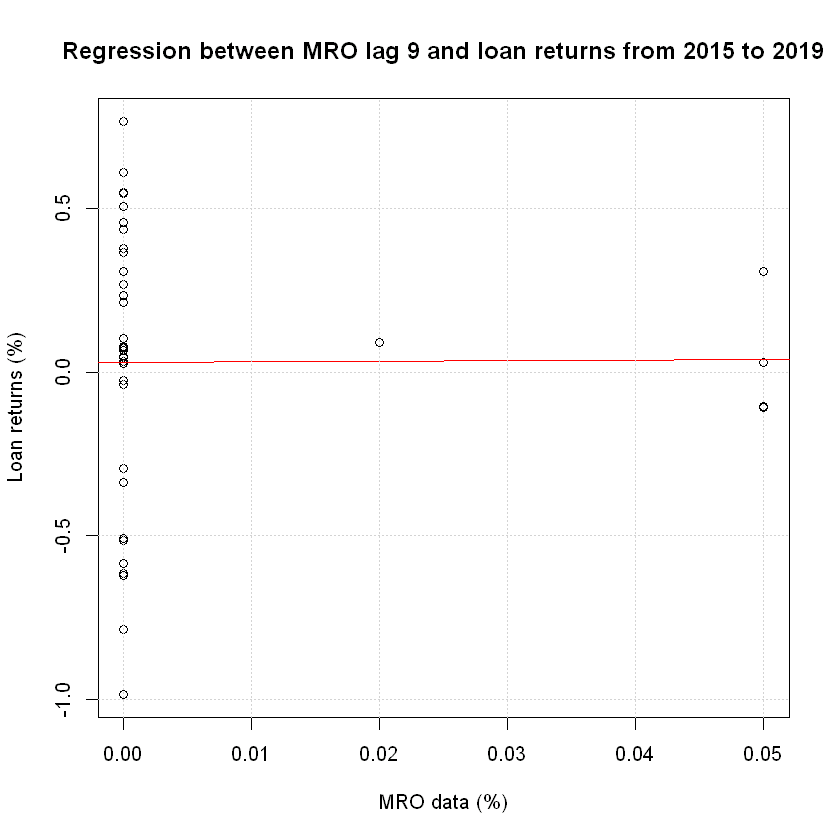

In [121]:
plot(as.numeric(MRO.loan.15.19.lag9[,1]),as.numeric(MRO.loan.15.19.lag9[,2]), xlab = "MRO data (%)", ylab = "Loan returns (%)", main = "Regression between MRO lag 9 and loan returns from 2015 to 2019")
abline(model_lag9.15.19, col='red')
grid()

In [141]:
summary(model_lag9.15.19)


Call:
lm(formula = MRO.loan.15.19.lag9[, 2] ~ MRO.loan.15.19.lag9[, 
    1])

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0149 -0.1432  0.0425  0.2757  0.7382 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)               0.02873    0.07051   0.407    0.686
MRO.loan.15.19.lag9[, 1]  0.17514    4.31802   0.041    0.968

Residual standard error: 0.4132 on 37 degrees of freedom
Multiple R-squared:  4.446e-05,	Adjusted R-squared:  -0.02698 
F-statistic: 0.001645 on 1 and 37 DF,  p-value: 0.9679


#### 2020–2022: Pandemic Response

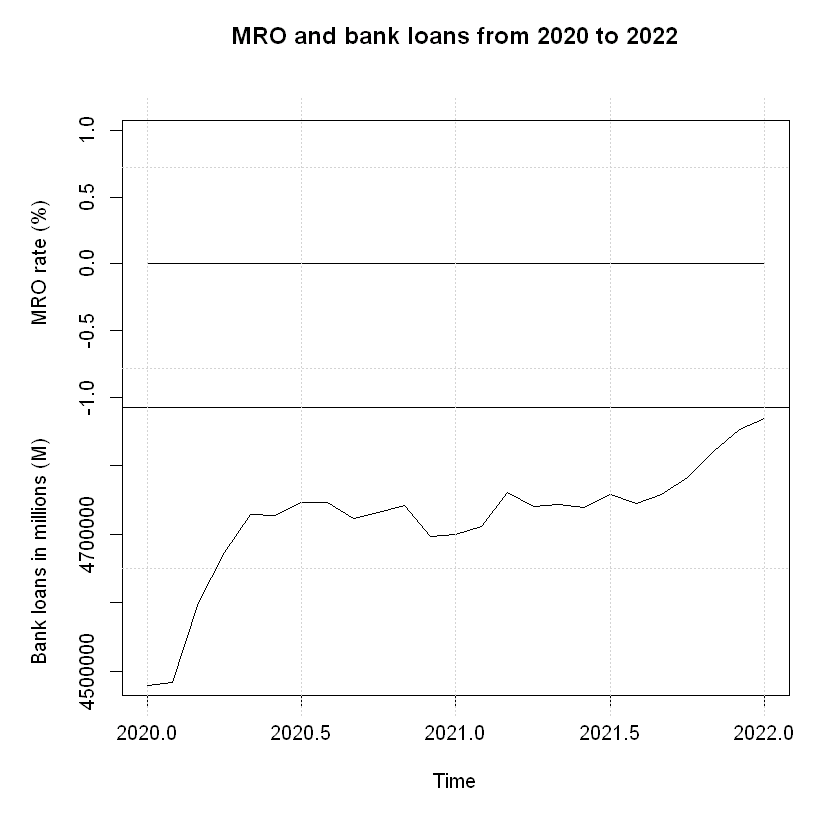

In [125]:
MRO.20.22=window(MRO, start=2020, end=2022)
loans.20.22=window(loans, start=2020, end=2022)
MROandLoans.20.22=cbind(MRO.20.22, loans.20.22)
colnames(MROandLoans.20.22)=c("MRO rate (%)", "Bank loans in millions (M)")
plot(MROandLoans.20.22, main = "MRO and bank loans from 2020 to 2022")
grid()

In this sub-period we note that loans continue to grow because the MRO remains constantly at zero.

#### 2023: Monetary policy normalization

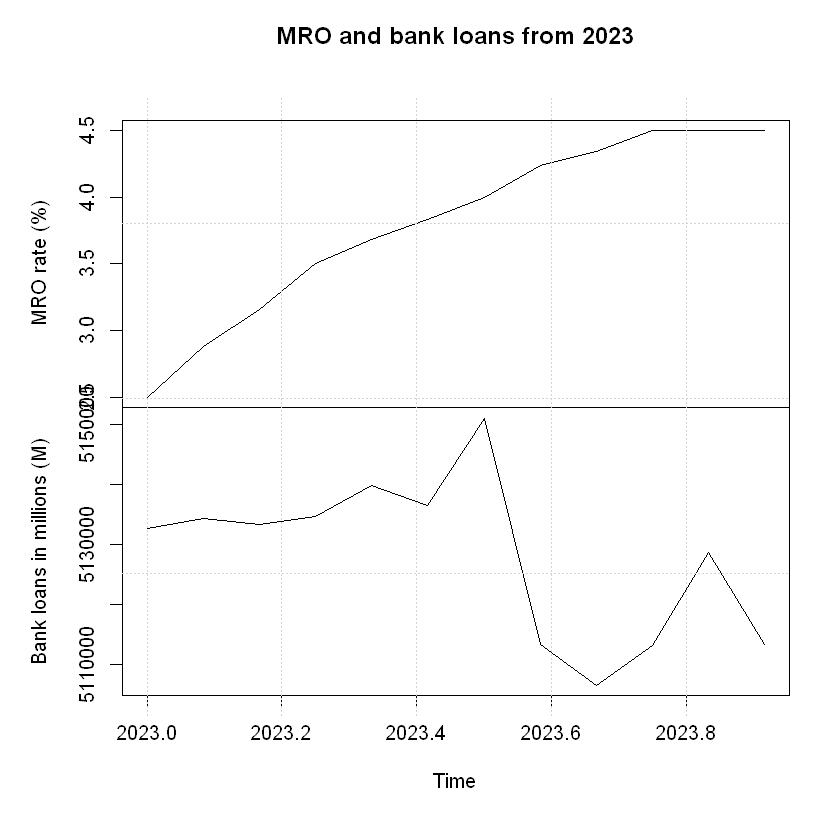

In [127]:
MRO.23=window(MRO, start=2023)
loans.23=window(loans, start=2023)
MROandLoans.23=cbind(MRO.23, loans.23)
colnames(MROandLoans.23)=c("MRO rate (%)", "Bank loans in millions (M)")
plot(MROandLoans.23, main = "MRO and bank loans from 2023")
grid()

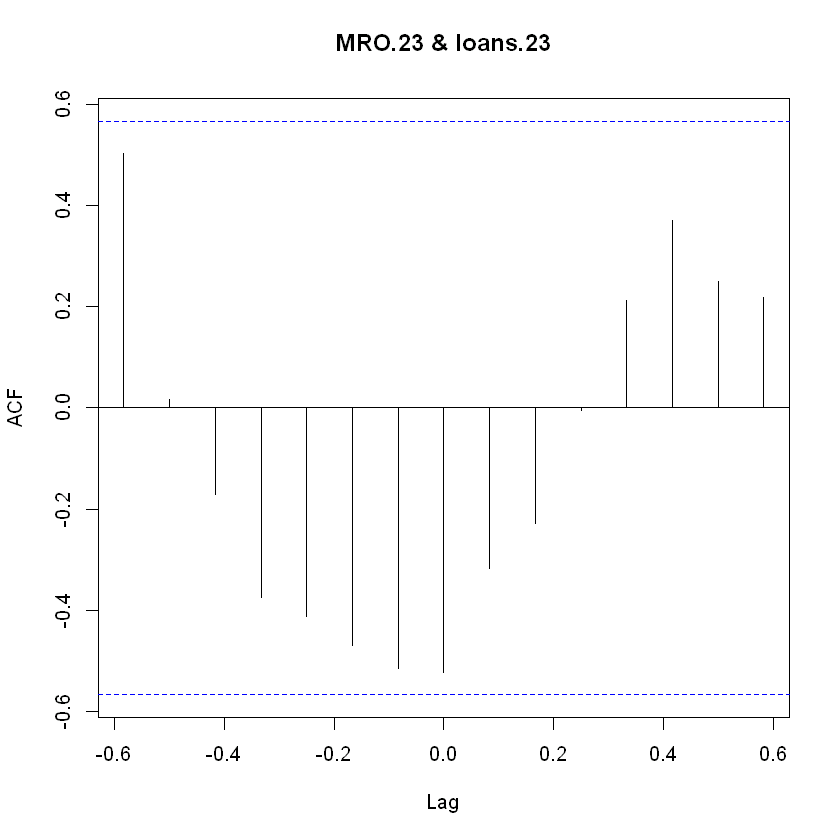

In [129]:
ccf(MRO.23, loans.23)

The correlogram of the cross-correlation between MRO shows higher values ​​at negative lags, this confirms that MRO precedes loans. We also note that the cross-correlation is negative in this case, the relationship between MRO and loans in this sub-period is inversely proportional as economic theory predicts. Let's find the right lag, but first let's calculate the loan returns needed to run the regressions:

In [131]:
loan_returns.23=(diff(loans.23)/lag(loans.23))*100
#lag3
MRO.23.lag3=lag(MRO.23, 3)
MRO.loan.23.lag3=ts.intersect(MRO.23.lag3, loan_returns.23) #We use the ts.intersect function to avoid length errors in regression
model_lag3.23=lm(MRO.loan.23.lag3[,2]~MRO.loan.23.lag3[,1]) 
#lag6
MRO.23.lag6=lag(MRO.23, 6)
MRO.loan.23.lag6=ts.intersect(MRO.23.lag6, loan_returns.23) 
model_lag6.23=lm(MRO.loan.23.lag6[,2]~MRO.loan.23.lag6[,1]) 
#lag9
MRO.23.lag9=lag(MRO.23, 9)
MRO.loan.23.lag9=ts.intersect(MRO.23.lag9, loan_returns.23) 
model_lag9.23=lm(MRO.loan.23.lag9[,2]~MRO.loan.23.lag9[,1])
#BIC&AIC
cat("AIC lag3:", AIC(model_lag3.23), " BIC lag3:", BIC(model_lag3.23))
cat(" AIC lag6:", AIC(model_lag6.23), " BIC lag6:", BIC(model_lag6.23))
cat(" AIC lag9:", AIC(model_lag9.23), " BIC lag9:", BIC(model_lag9.23))

AIC lag3: 7.578301  BIC lag3: 7.816625 AIC lag6: -8.757696  BIC lag6: -9.929383 AIC lag9: -4.755057  BIC lag9: -7.368762

Both criteria confirm that the best lag is lag 6. Let's analyze the model with this lag:

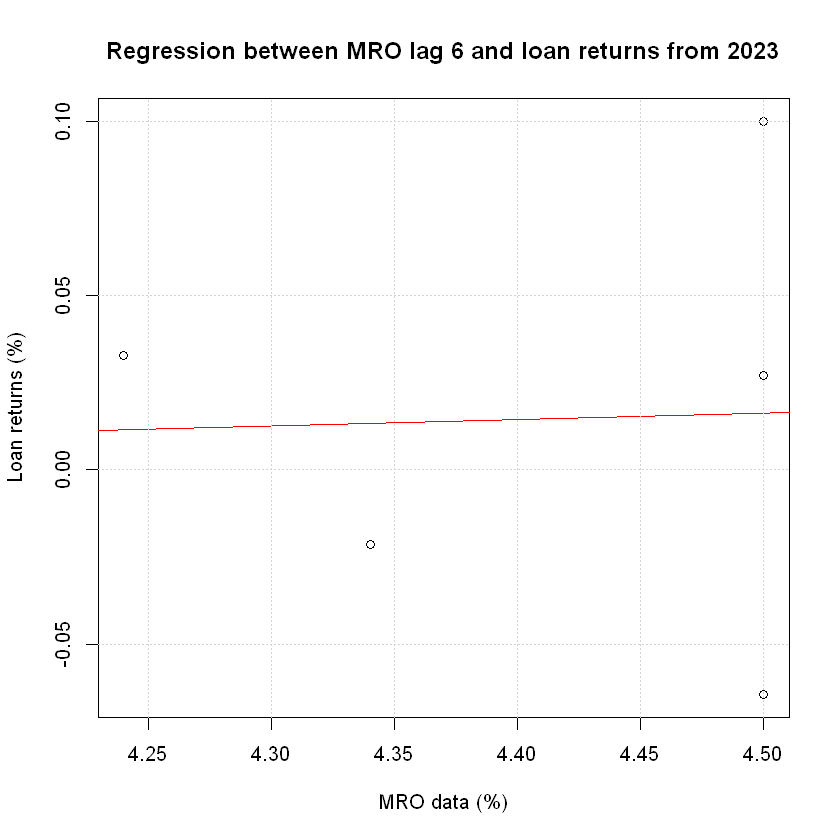

In [133]:
plot(as.numeric(MRO.loan.23.lag6[,1]),as.numeric(MRO.loan.23.lag6[,2]), xlab = "MRO data (%)", ylab = "Loan returns (%)", main = "Regression between MRO lag 6 and loan returns from 2023")
abline(model_lag6.23, col='red')
grid()

In [143]:
summary(model_lag6.23)


Call:
lm(formula = MRO.loan.23.lag6[, 2] ~ MRO.loan.23.lag6[, 1])

Residuals:
       1        2        3        4        5 
 0.02136 -0.03472  0.01061  0.08359 -0.08085 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)
(Intercept)           -0.06705    1.31073  -0.051    0.962
MRO.loan.23.lag6[, 1]  0.01853    0.29673   0.062    0.954

Residual standard error: 0.07141 on 3 degrees of freedom
Multiple R-squared:  0.001299,	Adjusted R-squared:  -0.3316 
F-statistic: 0.003902 on 1 and 3 DF,  p-value: 0.9541
